# import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# simple linear regression

coef is [[39.02850749]]
intercept is [125.85377063]


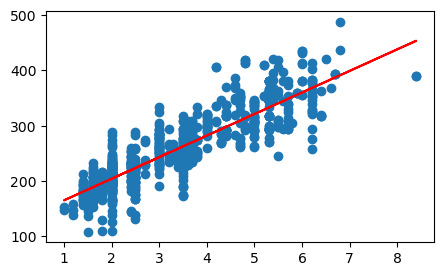

accuracy is 0.8061290235267039


In [37]:
emission = pd.read_csv("FuelConsumptionCo2.csv")
cdf = emission[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
x = np.random.rand(len(cdf)) < 0.8

train = cdf[x]
test = cdf[~x]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

print(f'coef is {regr.coef_}')
print(f'intercept is {regr.intercept_}')

plt.figure(figsize=(5,3))
plt.scatter(train_x,train_y)
plt.plot(train_x,regr.coef_[0][0] * train_x + regr.intercept_[0] ,'red')
plt.show()

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)

print(f'accuracy is {r2_score(test_y,test_y_)}')

# polynomial regression

coef is [[ 0.        49.5480543 -1.4435158]]
intercept is [109.46058575]


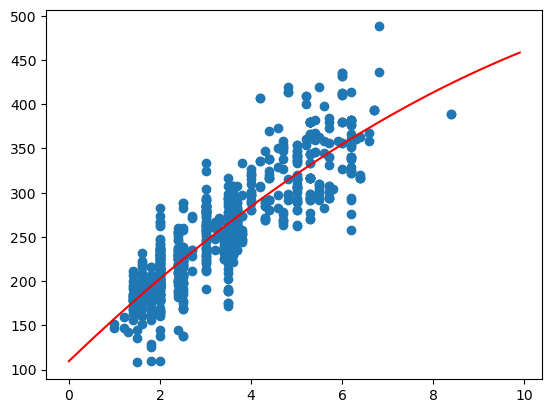

your score is 0.7883626231404243


In [8]:
emission = pd.read_csv("FuelConsumptionCo2.csv")
cdf = emission[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

x = np.random.rand(len(cdf)) < 0.8

train = cdf[x]
test = cdf[~x]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)

regr = linear_model.LinearRegression()
regr.fit(train_x_poly,train_y)

print(f'coef is {regr.coef_}')
print(f'intercept is {regr.intercept_}')

plt.scatter(train_x,train_y)
z = np.arange(0.0,10.0,0.1)
plt.plot(z,regr.coef_[0][0]* np.power(z,0) + regr.coef_[0][1] * np.power(z,1) + regr.coef_[0][2] * np.power(z,2) + regr.intercept_[0] , 'red')
plt.show()

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = regr.predict(test_x_poly)

print(f'your score is {r2_score(test_y,test_y_)}')